# **1. Data Description & Process**

##**1.1 Traffic Performance Score Dataset**







###**1.1.1 Data introduction**

Traffic performance measurement is crucial for both owners and users of transportation infrastructures. TPS for a segment is calculated as

$TPS^{t} =
  \frac{\sum_{i=1}^{n} V_{i}^{t} \cdot Q_{i}^{t} \cdot L_i}{\sum_{i=1}^{n} V_f \cdot Q_{i}^{t} \cdot L_i} \times 100 \%
$

where `i` is for index of loop detectors in the segment, `n` for the number of loop detectors in the segment, `t` for time, `V` for speed, `Vf` for free-flow speed, `Q` for volume, `L` for length.

There are two datasets needed for this assignment:

*   `tps_df.pkl`: Traffic Performance Score Matrix, which is a pickled file that can be read by pandas or other python packages.
*   `Test Folder`: List of testing data (weekday/weekend and morning/afternoon peak) 

###**1.1.2 Loop detectors distribution**

The data is collected by the ***inductive loop detectors*** deployed on freeways in Seattle area. The freeways contains I-5, I-405, I-90, and SR-520, shown in the below picture. This dataset contains traffic performance score, spatio-temporal speed and volume information of the freeway system. In the picture, each blue icon demonstrates loop detectors at a milepost. The speed information at a milepost is averaged from multiple loop detectors on the mainlanes in a same direction at the specific milepost. The time interval of the dataset is 15-minute.

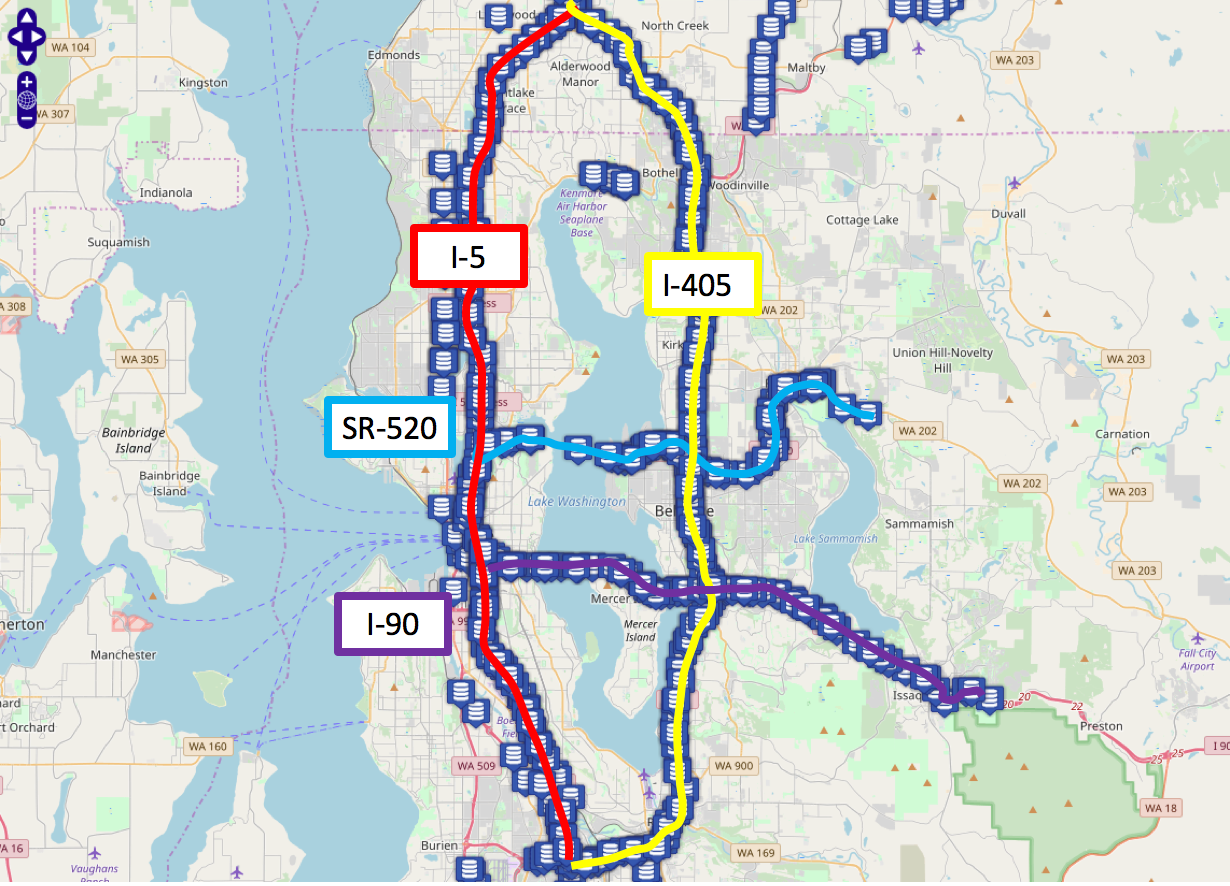

###**1.1.3 Training Data: tps_df**

It is a training dataset from Jan. 1st, 2020 to May 31th, 2020 with 15-minute time interval. A demo of the tps_df.pkl is shown in the following figure. The horizontal header denotes the average speed and volume on both GP and HOV lanes. Some `None`s in column `AVG_Vol_GP` and `AVG_Spd_HOV` means no HOV lane in a specific segment. The vertical header indicates the timestamps.

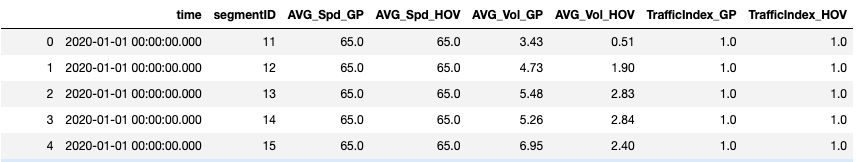

###**1.1.4 Testing Data**
Here we provide `15` testing data, all with 36 previous time steps. These datasets cover weekday and weekend and morning and afternoon peak hours. You are asking to predict the next 12 steps ahead of `TrafficIndex_GP.` 

*   `tps_1`: Testing data: `2020-06-01 21:15:00` to `2020-06-02 06:00:00`; Predict `2020-06-02 06:15:00` to `2020-06-02 09:00:00`

*   `tps_2`: Testing data: `2020-06-02 22:15:00` to `2020-06-03 07:00:00`; Predict `2020-06-03 07:15:00` to `2020-06-03 10:00:00`

*   `tps_3`: Testing data: `2020-06-03 23:15:00` to `2020-06-04 08:00:00`; Predict `2020-06-04 08:15:00` to `2020-06-04 11:00:00`

*   `tps_4`: Testing data: `2020-06-05 00:15:00` to `2020-06-05 09:00:00`; Predict `2020-06-05 09:15:00` to `2020-06-05 12:00:00`

*   `tps_5`: Testing data: `2020-06-06 01:15:00` to `2020-06-06 10:00:00`; Predict `2020-06-06 10:15:00` to `2020-06-06 13:00:00`

*   `tps_6`: Testing data: `2020-06-07 02:15:00` to `2020-06-07 11:00:00`; Predict `2020-06-07 11:15:00` to `2020-06-07 14:00:00`

*   `tps_7`: Testing data: `2020-06-08 03:15:00` to `2020-06-08 12:00:00`; Predict `2020-06-08 12:15:00` to `2020-06-08 15:00:00`

*   `tps_8`: Testing data: `2020-06-09 04:15:00` to `2020-06-09 13:00:00`; Predict `2020-06-09 13:15:00` to `2020-06-09 16:00:00`

*   `tps_9`: Testing data: `2020-06-10 05:15:00` to `2020-06-10 14:00:00`; Predict `2020-06-10 14:15:00` to `2020-06-10 17:00:00`

*   `tps_10`: Testing data: `2020-06-11 06:15:00` to `2020-06-11 15:00:00`; Predict `2020-06-11 15:15:00` to `2020-06-11 18:00:00`

*   `tps_11`: Testing data: `2020-06-12 07:15:00` to `2020-06-12 16:00:00`; Predict `2020-06-12 16:15:00` to `2020-06-12 19:00:00`

*   `tps_12`: Testing data: `2020-06-13 08:15:00` to `2020-06-13 17:00:00`; Predict `2020-06-13 17:15:00` to `2020-06-13 20:00:00`

*   `tps_13`: Testing data: `2020-06-14 09:15:00` to `2020-06-14 18:00:00`; Predict `2020-06-14 18:15:00` to `2020-06-14 21:00:00`

*   `tps_14`: Testing data: `2020-06-15 10:15:00` to `2020-06-15 19:00:00`; Predict `2020-06-15 19:15:00` to `2020-06-15 22:00:00`

*   `tps_15`: Testing data: `2020-06-16 11:15:00` to `2020-06-16 20:00:00`; Predict `2020-06-16 20:15:00` to `2020-06-16 23:00:00`

##**1.2 Data Process Demo**

###**1.2.1 Read dataset**

The downloaded file  is a Python pickled file that can be read by using  [Pandas.read_pickle()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.read_pickle.html), and we load the data from the local file and show the top 10 rows as a demonstration:

In [ ]:
import pandas as pd
tps_df = pd.read_pickle('tps_df.pkl')
tps_df.head(10)

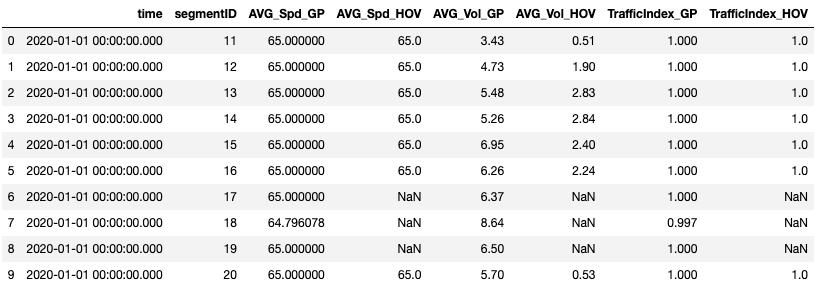

###**Reshape dataframe**

In the original dataframe, one row only represents a specific segment. Here we can reshape it as follows. Every row in the reshaped dataframe would contain the feature from all road segments. The horizontal header denotes the segment ID. The shape of the reshaped dataframe is: `(T, num_of_segment).`

In [ ]:
reshaped_tps_df = pd.DataFrame()
reshaped_tps_df['TIME'] = tps_df.time.unique()
for seg in tps_df.segmentID.unique():
    column = tps_df[tps_df['segmentID'] == seg][['time','TrafficIndex_GP']].drop_duplicates(subset=['time'])
    column.columns = ['TIME', str(seg)]
    reshaped_tps_df = reshaped_tps_df.join(column.set_index('TIME'), on='TIME')

reshaped_tps_df = reshaped_tps_df.set_index('TIME')
reshaped_tps_df

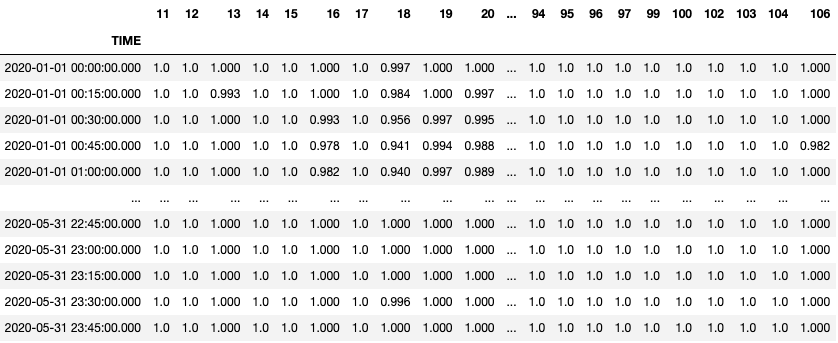

###**1.2.3 Expected Prediction Result**

After training by the given dataset, you can further use testing data to evaluate the model performance. The submitted prediction result should be a `.json file.` Before the submission, please re-format the output dataframe with the following details:

*   The row index is the Unix format timestamps, and the column index should be the segment ID. This prediction problem is formulated as a 12 steps-ahead forecasting task given the previous 36 steps. Take `tps_1` as an example. The testing data is from `2020-06-01 21:15:00 to 2020-06-02 06:00:00 with 15-min interval`. The expected output should be from `2020-06-02 06:15:00 to 2020-06-02 09:00:00 with 15-min interval` for all segments. 

*   The column index (11, 12, ..., 104, 106) should be the same as the example file. Please take a look at the example file: `predict_result_format.json` [(link)](https://drive.google.com/file/d/1b1DqEmwNK7TXqWkShy0rSioRf9hwBpVs/view?usp=sharing) in the Test folder. (Note: The number in the figure is replaced by random values)

*   The final dataframe has `(n_segment)` columns. `n_segment` is `87` in our given dataset, which means the rest 87 columns should present the predicted `TrafficIndex_GP` for each segment.

*   The final dataframe has `180` rows, representing the following 12-time steps predictions for 15 testing data.

*   The predicted `TrafficIndex_GP` should be round by 3.

*   Please use `$dataframe.to_json($filepath)` to convert the formated dataframe to a json file.

*   To ensure the submitting file's shape is correct, you can use `pandas.read_json($file_path)` to read your submitted file and check if the shape of dataframe is `(180 x 87)`.

*   You can also use the following codes to format the submit file (the timestamp should be converted to Unix format with the following codes):

In [ ]:
# First, make sure the prediction result is a martrix with shape (12, 87).
output_1 = pd.DataFrame(prediction_result)
# Here we take the tps_1 testing data as an exmaple. The predicted time frame is between 2020-06-01 16:15:00 and 2020-06-01 19:00:00.
# Convert the datetime to unix format as follows. Please change the range the datetime correctly!
output_1.index = pd.date_range(start='2020-06-01 16:15:00', end='2020-06-01 19:00:00', freq='15min').astype(int) / 10**9
# The output file's column name should be the same as the reshaped dataframe mentioned earlier.
output_1.columns = reshaped_tps_df.columns

'''
Test all 17 testing data and concat them together "in order".
The shape of the final_output dataframe would be 204 (12 * 17) rows × 87 columns
Here we only take two testing data as an example, the predicted results would be output_1 and output_2
'''
final_output = pd.concat([output_1, output_2])
final_output.to_json('prediction_result.json')

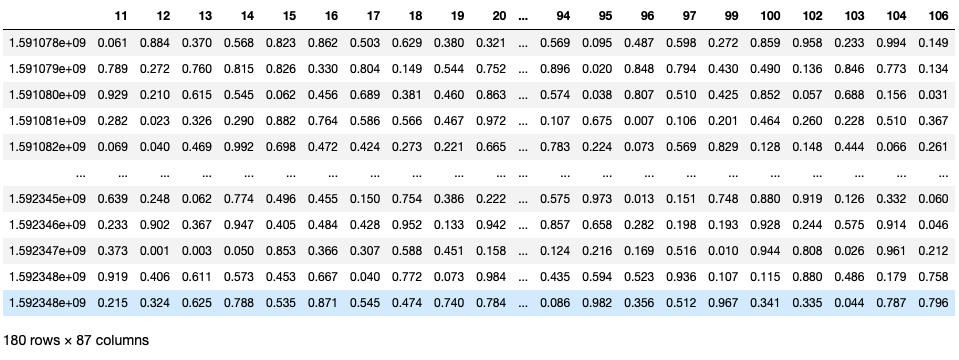

## **1.3 Evaluation Metric**

Mean Squared Error (MSE) and Mean Absolute percentage Error (MAPE)are selected to evaluate the model accuracy in this traffic forecasting task and can be calculated using the following equations:

$MSE = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2$

$MAPE = \frac{1}{n}\sum_{i=1}^n \left| \frac{y_i - \hat{y}_i}{y_i}\right| \times 100\%$

where $y_i$ and $\hat{y}_i$ represents the ground truth and predicted value respectively.